In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

path = './iris.csv'
data = pd.read_csv(path, index_col=0)


coloums = data.columns
data_v = data.values

data.iloc[0, 0]
data.iloc[1, :]
data.iloc[:, -1]

model = KNeighborsClassifier(n_neighbors=5, p=1)
X = data.iloc[:, 0:4]
y = data.iloc[:, -1]

model.fit(X, y)
model.score(X, y)

area1 = data.iloc[:, 0] * data.iloc[:, 1]
area2 = data.iloc[:, 2] * data.iloc[:, 3]
data['area1'] = area1
data['area2'] = area2
data_final = data.iloc[:, [0, 1, 2, 3, 4, 5, 6]]

save_path = './iris_new.csv'
data_final.to_csv(save_path)

In [2]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.4)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y)

print(model.score(train_X, train_y))
print(model.score(test_X, test_y))

0.9888888888888889
0.95


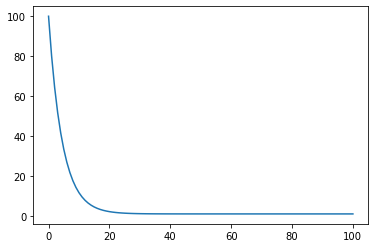

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * x - 2 * x - 5


def fderiv(x):
    return 2 * x - 2


learning_rate = 0.1
n_iter = 100

xs = np.zeros(n_iter + 1)
xs[0] = 100

for i in range(n_iter):
    xs[i + 1] = xs[i] - learning_rate * fderiv(xs[i])

plt.plot(xs)

0.36787944117144233


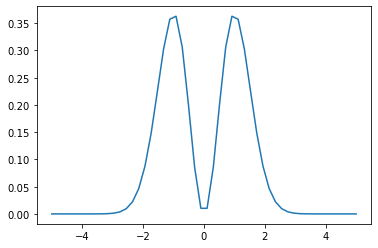

In [4]:
from scipy.optimize import minimize

a = minimize(f, x0=100).x

def f2(x):
    return np.exp(-x ** 2) * (x**2)

print(f2(1))
a = minimize(f2, x0=5).x
b = minimize(f2, x0=-5).x

x = np.linspace(-5, 5)
y = f2(x)
plt.plot(x, y)

In [8]:
dataSet = [
        # 1
        ['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
        # 2
        ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', '好瓜'],
        # 3
        ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
        # 4
        ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', '好瓜'],
        # 5
        ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
        # 6
        ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', '好瓜'],
        # 7
        ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', '好瓜'],
        # 8
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', '好瓜'],

        # ----------------------------------------------------
        # 9
        ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', '坏瓜'],
        # 10
        ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', '坏瓜'],
        # 11
        ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', '坏瓜'],
        # 12
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', '坏瓜'],
        # 13
        ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', '坏瓜'],
        # 14
        ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', '坏瓜'],
        # 15
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', '坏瓜'],
        # 16
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑', '坏瓜'],
        # 17
        ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑', '坏瓜']
    ]

data = pd.DataFrame(data=dataSet, columns=[
    ['色泽', '根蒂', '敲击', '纹理', '脐部', '触感', '好瓜']
])

In [10]:
data.to_csv('xigua.csv')

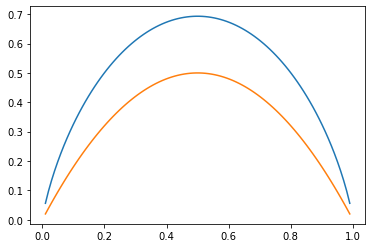

In [13]:

'''
决策树停止的条件

1. 全都分类了
2. 没有特征了
'''

'''
什么样的特征是好特征？

信息量为0时，概率只能推断为50%
信息量很大时，可能准确计算出概率

如何描述信息量的大小
x: 白球出现的概率
y: 信息量

x = 0或1时，y最大，信息熵最小
x = 0.5时，y最小，信息熵最大
y关于x=0.5对称

-(plnp + qlnq)

1 - p^2 - (1-p)^2
'''

def E(x):
    a = - x * np.log(x) - (1-x) * np.log(1-x)
    return a

def E2(x):
    a = 1 - x ** 2 - (1-x) ** 2
    return a

x = np.linspace(0.01, 0.99, 100)
y = E(x)

plt.plot(x, y)

y2 = E2(x)
plt.plot(x, y2)

[Text(334.79999999999995, 489.24, 'X[3] <= 0.5\nentropy = 0.998\nsamples = 17\nvalue = [8, 9]'),
 Text(223.2, 380.52000000000004, 'X[5] <= 0.5\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(167.39999999999998, 271.8, 'X[2] <= 1.0\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(111.6, 163.08000000000004, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(55.8, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.39999999999998, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.2, 163.08000000000004, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 271.8, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(446.4, 380.52000000000004, 'X[5] <= 0.5\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(390.59999999999997, 271.8, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(334.79999999999995, 163.08000000000004, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(446.4, 163.080

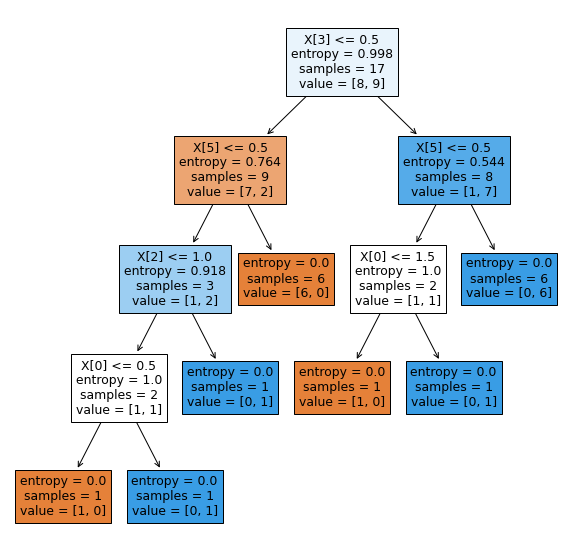

In [25]:
"""
8个好瓜 9个坏瓜
p = 8/17  q=9/17, 可带入计算信息熵


色泽
青绿：3/3  p=3/6   权重: 6/17
乌黑: 4/2  p=4/6   权重: 6/17
浅白: 1/5  p=1/5   权重: 5/17

每一次都选择信息熵最小的特征进行决策
"""


"""
决策树能否对连续数据使用吗

选取分割点对连续数据进行分类

遍历分割点找信息熵最小的分割点：对连续数据离散化
"""

wm = pd.read_csv('./wm_1.csv', index_col=0)
X = wm.iloc[:, :6]
y = wm.iloc[:, -1]

import sklearn.tree as tree

model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

plt.figure(figsize=(10, 10))
tree.plot_tree(model, filled=True)

1.0
0.9298245614035088


[Text(781.2, 1019.25, 'X[22] <= 116.05\ngini = 0.482\nsamples = 341\nvalue = [138, 203]'),
 Text(595.2, 883.35, 'X[27] <= 0.147\ngini = 0.185\nsamples = 223\nvalue = [23, 200]'),
 Text(446.40000000000003, 747.45, 'X[23] <= 957.45\ngini = 0.092\nsamples = 206\nvalue = [10, 196]'),
 Text(372.0, 611.55, 'X[13] <= 35.435\ngini = 0.067\nsamples = 203\nvalue = [7, 196]'),
 Text(148.8, 475.65, 'X[20] <= 15.745\ngini = 0.031\nsamples = 192\nvalue = [3, 189]'),
 Text(74.4, 339.75, 'gini = 0.0\nsamples = 170\nvalue = [0, 170]'),
 Text(223.20000000000002, 339.75, 'X[0] <= 13.645\ngini = 0.236\nsamples = 22\nvalue = [3, 19]'),
 Text(148.8, 203.85000000000002, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(297.6, 203.85000000000002, 'X[20] <= 15.795\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(223.20000000000002, 67.95000000000005, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(372.0, 67.95000000000005, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(595.2, 475.65, 'X[1] <= 21.41

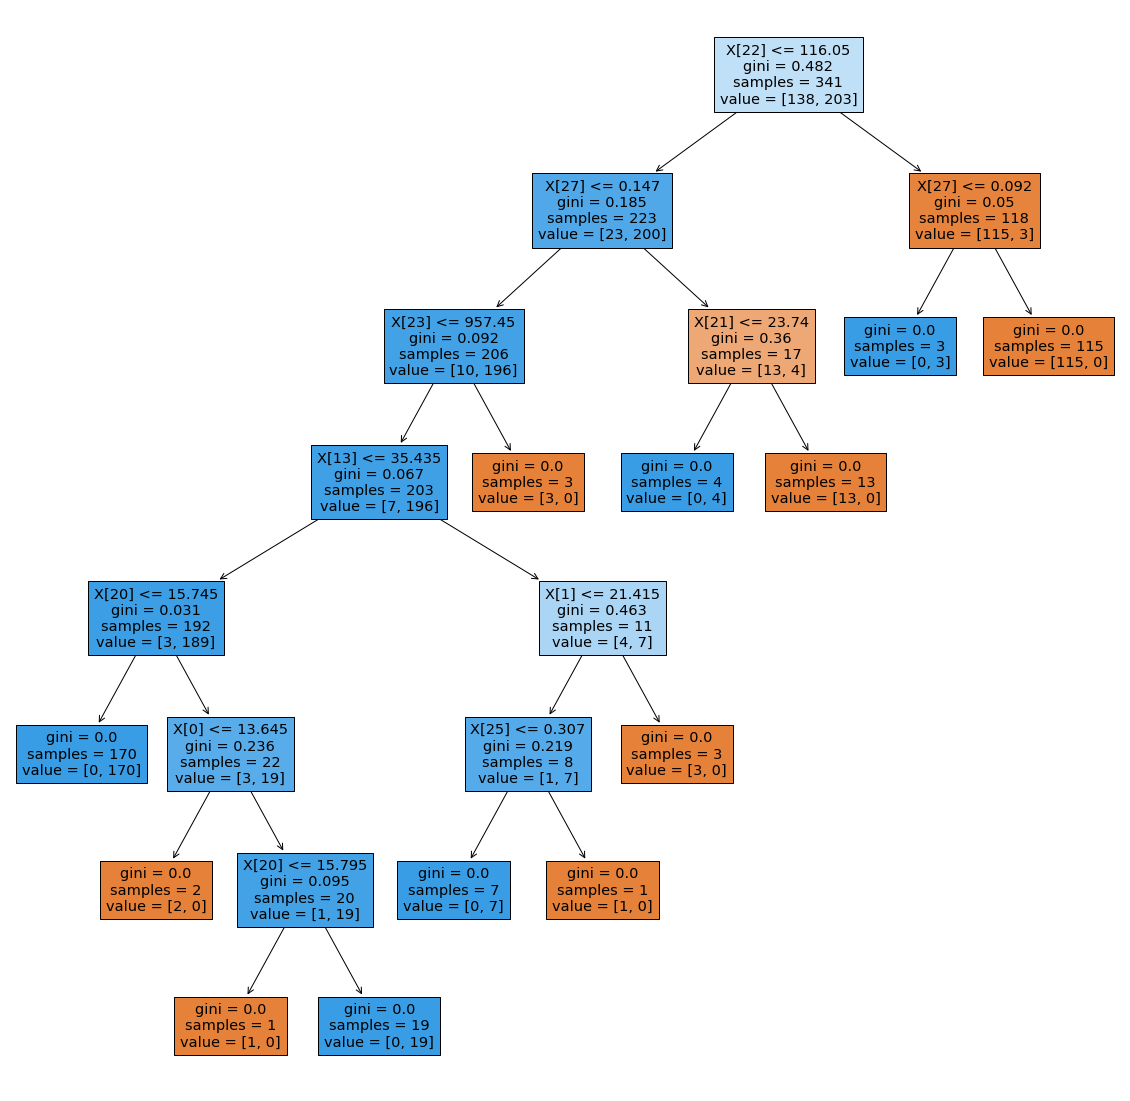

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

bc = load_breast_cancer()
X = bc.data
y = bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
model = tree.DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

plt.figure(figsize=(20, 20))
tree.plot_tree(model, filled=True)

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

bc = load_breast_cancer()
X = bc.data
y = bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

model = tree.DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)

print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))


model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train, y_train)

print(model3.score(X_train, y_train))
print(model3.score(X_test, y_test))


1.0
0.8991228070175439
0.9472140762463344
0.9254385964912281
0.9648093841642229
0.9385964912280702


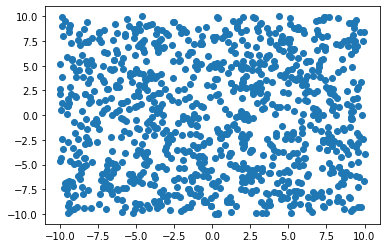

In [45]:
import numpy as np

sample_size = 1000
X = np.random.uniform(-10, 10, (sample_size, 2))

plt.scatter(X[:, 0], X[:, 1])


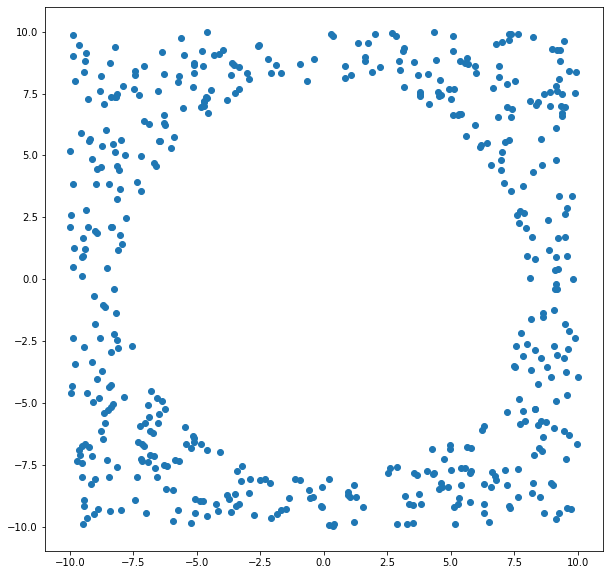

In [52]:
radius = 8

labels = np.zeros(sample_size)

for i in range(sample_size):
    if np.sqrt(X[i, 0] ** 2 ++ X[i, 1] ** 2) <= radius:
        labels[i] = 1
    else:
        labels[i] = 0
        
# plt.scatter(X[labels == 1, 0], X[labels == 1, 1])
# 默认的x和y不是1：1等比例的，可以调整
plt.figure(figsize=(10, 10))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1])

In [12]:
import pandas as pd
import numpy as np

path = './iris.csv'
data = pd.read_csv(path, index_col=0)

data['label'] = (np.floor(data.index / 10) + 1).astype(np.int64)

data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,15
146,6.3,2.5,5.0,1.9,2,15
147,6.5,3.0,5.2,2.0,2,15
148,6.2,3.4,5.4,2.3,2,15


In [40]:
cols = list(d.columns)
cols.insert(0, cols.pop())

d2 = d[cols]


,label,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,1,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,1,4.7,3.2,1.3,0.2,0
3,1,4.6,3.1,1.5,0.2,0
4,1,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,15,6.7,3.0,5.2,2.3,2
146,15,6.3,2.5,5.0,1.9,2
147,15,6.5,3.0,5.2,2.0,2
148,15,6.2,3.4,5.4,2.3,2
